# Data Exploration and Analysis of Cryptocurrencies

![](images/new.png)


### Analysis: 
---
Price action, Volume, Volatility, Correlation

### Research Question: 
---
* How do cryptocurrencies trade (i.e., price, volume, etc.) ?
* Do they trade similar to other financial assets (e.g.,. stocks, bonds, gold, etc.)? 
* Within the cryptocurrency asset class, is there a strong correlation among the different cryptocurrencies (e.g., Bitcoin, Ethereum, etc)?  
* Do cryptocurrencies offer non-correlated returns to traditional financial stock?

### Insights:
---
* How do cryptocurrency markets behave? Similar or different to other financial assets?
* Are the markets for different cryptocurrencies inseparably linked or largely independent?
* How did the historical prices / market capitalizations of various cryptocurrencies change over time?
* Which cryptocurrencies are more volatile and which are more stable?
* How does the price fluctuations of cryptocurrencies correlate with each other?


### Loading PyData libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import glob
import os

%matplotlib inline

### Loading data from csv files
we load cryptocurrecies data into the variable 'files' and and s&p 500 stock data into the variable 'file_sp'

In [2]:
files = glob.glob("raw_data/*.csv")
files

['raw_data/bitconnect_price.csv',
 'raw_data/iota_price.csv',
 'raw_data/ripple_price.csv',
 'raw_data/qtum_price.csv',
 'raw_data/dash_price.csv',
 'raw_data/neo_price.csv',
 'raw_data/monero_price.csv',
 'raw_data/numeraire_price.csv',
 'raw_data/bitcoin_price.csv',
 'raw_data/stratis_price.csv',
 'raw_data/bitcoin_cash_price.csv',
 'raw_data/waves_price.csv',
 'raw_data/litecoin_price.csv',
 'raw_data/ethereum_price.csv',
 'raw_data/nem_price.csv',
 'raw_data/omisego_price.csv',
 'raw_data/ethereum_classic_price.csv']

In [3]:
file_sp = glob.glob("stock_data/*.csv")
file_sp

['stock_data/sp500-10-year-daily-chart.csv']

### Create pandas dataframes for s&p 500 stock data
**sandp** will contain s&p 500 data

In [4]:
sandp = pd.read_csv(file_sp[0], skiprows=13)
sandp.columns =['date', 'close']
sandp['name'] = 'sp500'
sandp = sandp.set_index('date')

In [5]:
sandp.head()

close   name
date                     
2008-11-28  896.24  sp500
2008-12-01  816.21  sp500
2008-12-02  848.81  sp500
2008-12-03  870.74  sp500
2008-12-04  845.22  sp500

### Create pandas dataframes for crypto data
**crypto** will contain crypto  data

In [6]:
# Dataframes will contain 17 dataframes one for each cryptocurrency
dataframes =[]
for csv in files:
    frame = pd.read_csv(csv, parse_dates=['Date'])
    frame.set_index('Date', inplace=True)
    frame['Name'] = os.path.basename(csv)[:-10]
    dataframes.append(frame)
    
# All the dataframes are concatenated into one single dataframe called crypto
crypto = pd.concat(dataframes)
display(crypto.head())
crypto.dtypes

Open  High   Low  Close   Volume  Market Cap        Name
Date                                                                
2018-02-20  3.97  4.16  3.44   3.52  157,912  36,680,600  bitconnect
2018-02-19  3.69  4.15  3.62   3.95  108,297  34,058,900  bitconnect
2018-02-18  4.34  4.34  3.66   3.70  150,823  40,037,400  bitconnect
2018-02-17  4.08  4.38  4.01   4.31  185,105  37,708,600  bitconnect
2018-02-16  4.06  4.19  3.87   4.13  149,639  37,459,600  bitconnect

Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
Name           object
dtype: object

In [7]:
# Store crypto names for future use
cc_names = crypto.Name.value_counts().index 

### Cleaning Data

In [8]:
# Change crypto columns to one lowercase word for ease of use
crypto.columns = crypto.columns.str.replace(' ', '').str.lower()
crypto.index.name = 'date'

In [9]:
# Replace crypto column data's unwanted characters for conversion to numeric types
crypto['volume'] = crypto['volume'].str.replace(',','')
crypto['volume'] = crypto['volume'].str.replace('-','')

crypto['marketcap'] = crypto['marketcap'].str.replace(',','')
crypto['marketcap'] = crypto['marketcap'].str.replace('-','')

# Convert columns to the correct datatypes for futher use
crypto['volume'] = pd.to_numeric(crypto['volume'])
crypto['marketcap'] = pd.to_numeric(crypto['marketcap'])


In [10]:
display(crypto.head())
display(crypto.size)
crypto.dtypes

open  high   low  close    volume   marketcap        name
date                                                                 
2018-02-20  3.97  4.16  3.44   3.52  157912.0  36680600.0  bitconnect
2018-02-19  3.69  4.15  3.62   3.95  108297.0  34058900.0  bitconnect
2018-02-18  4.34  4.34  3.66   3.70  150823.0  40037400.0  bitconnect
2018-02-17  4.08  4.38  4.01   4.31  185105.0  37708600.0  bitconnect
2018-02-16  4.06  4.19  3.87   4.13  149639.0  37459600.0  bitconnect

97314

open         float64
high         float64
low          float64
close        float64
volume       float64
marketcap    float64
name          object
dtype: object

### Plot Cryptocurrency by Market Capital

In [11]:
cc_by_name = crypto.groupby('name') # create groups for each bitcoin

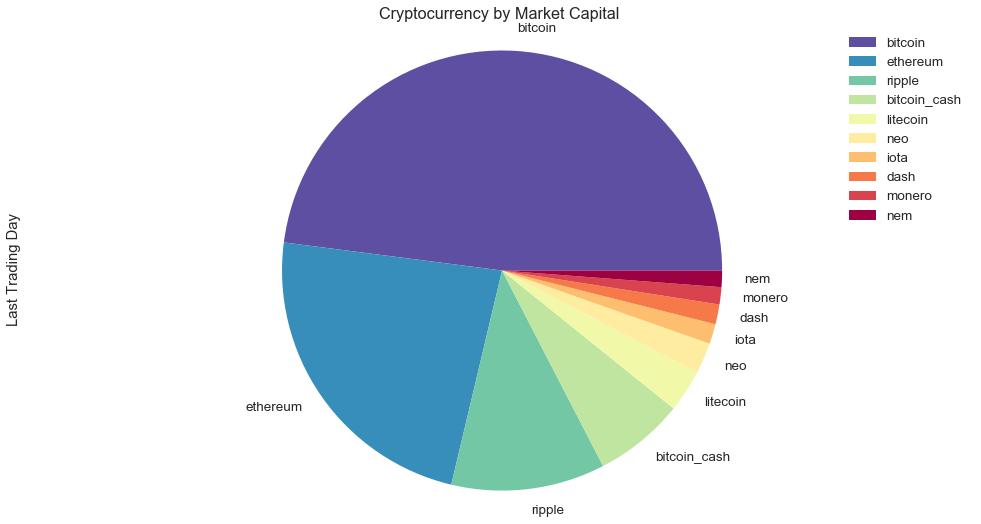

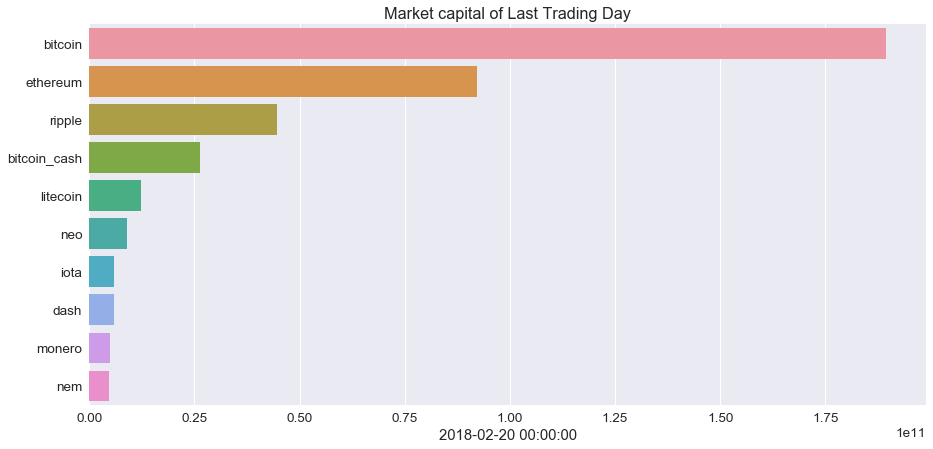

In [12]:
# Plot Cryptocurrency by market cap - Pie chart
sns.set(font_scale=1.35)
mc_pie = [cc_by_name.get_group(i)['2018-02-20']['marketcap'] for i in cc_names]
mc_pie = pd.DataFrame(mc_pie, index = cc_names)
mc_pie =mc_pie.sort_values(by='2018-02-20 00:00:00',ascending=False)
mc_pie[:10].plot(y='2018-02-20 00:00:00',kind='pie',figsize=(17,9),sort_columns=False,colormap='Spectral_r')
plt.title('Cryptocurrency by Market Capital')
plt.ylabel('Last Trading Day')
plt.axis('equal')
plt.show()

# Plot Cryptocurrency by market cap - bar chart
mc_bar = [cc_by_name.get_group(i)['2018-02-20']['marketcap'] for i in cc_names]
mc_bar = pd.DataFrame(mc_bar, index = cc_names)
mc_bar =mc_bar.sort_values(by='2018-02-20 00:00:00',ascending=False)
plt.figure(1, figsize=(15,7))
plt.title('Market capital of Last Trading Day')
sns.barplot(x='2018-02-20 00:00:00',y=mc_bar.index[:10], data=mc_bar[:10]);

### Price action behavior of Bitcoin - Animation

In [13]:
test_cc_by_date = cc_by_name.get_group('bitcoin')[:143].sort_values(by = 'date', ascending = True) #cc_by_date.marketcap.sum().apply(lambda x: (x-mean)/std)

test_cc_by_date = cc_by_name.get_group('bitcoin')[:143].sort_values(by = 'date', ascending = True) #data from Oct-01 2017

import plotly
import plotly.plotly as py
from plotly.grid_objs import Grid, Column
from plotly.tools import FigureFactory as FF 
plotly.tools.set_credentials_file(username='sonalthakkar', api_key='SEIj7XiLlotei09PfZYA')

import time
from datetime import datetime

def to_unix_time(dt):
    epoch =  datetime.utcfromtimestamp(0)
    return (dt - epoch).total_seconds() * 1000

crypto_price = list(test_cc_by_date['close'])

my_columns = []
for k in range(len(test_cc_by_date.index) - 1):
    my_columns.append(Column(list(test_cc_by_date.index)[:k + 1], 'x{}'.format(k + 1)))   
    my_columns.append(Column(crypto_price[:k + 1], 'y{}'.format(k + 1)))
    
grid = Grid(my_columns)

py.grid_ops.upload(grid, 'Crypto-daily-stock-price' + str(time.time()), auto_open=False)

test_cc_by_date = cc_by_name.get_group('bitcoin')[:143].sort_values(by = 'date', ascending = True)
data=[dict(type='scatter',
           xsrc=grid.get_column_reference('x1'),
           ysrc= grid.get_column_reference('y1'),
           name='bitcoin',
           mode='lines',
           line=dict(color= 'rgb(114, 186, 59)'),
           fill='tozeroy',
           fillcolor='rgba(114, 186, 59, 0.5)')]

axis=dict(ticklen=4,
          mirror=True,
          zeroline=False,
          showline=True,
          autorange=False,
          showgrid=False)

layout = dict(title='Bitcoin Daily Close Price',
              font=dict(family='Balto'),
              showlegend=True,
              autosize=False,
              width=800,
              height=400,
              xaxis=dict(axis, **{'nticks':12, 'tickangle':-45,
                                  'range': [to_unix_time(datetime(2017, 10, 1)),
                                            to_unix_time(datetime(2018, 2, 20))]}),
              yaxis=dict(axis, **{'title': '$', 'range':[0,20000]}),
              updatemenus=[dict(type='buttons',
                                showactive=False,
                                y=1,
                                x=1.1,
                                xanchor='right',
                                yanchor='top',
                                pad=dict(t=0, r=10),
                                buttons=[dict(label='Play',
                                              method='animate',
                                              args=[None, dict(frame=dict(duration=50, redraw=False), 
                                                               transition=dict(duration=0),
                                                               fromcurrent=True,
                                                               mode='immediate')])])])

frames=[{'data':[{'xsrc': grid.get_column_reference('x{}'.format(k + 1)),
                  'ysrc': grid.get_column_reference('y{}'.format(k + 1))}],
         'traces': [0]
        } for k in range(len(test_cc_by_date.index) - 1)]

fig=dict(data=data, layout=layout, frames=frames)
py.icreate_animations(fig, 'Bitcoin-closeprice' + str(time.time()))

### Plot closing prices and volumes for all currencies over sample size
Currencies do not have the same range of dates

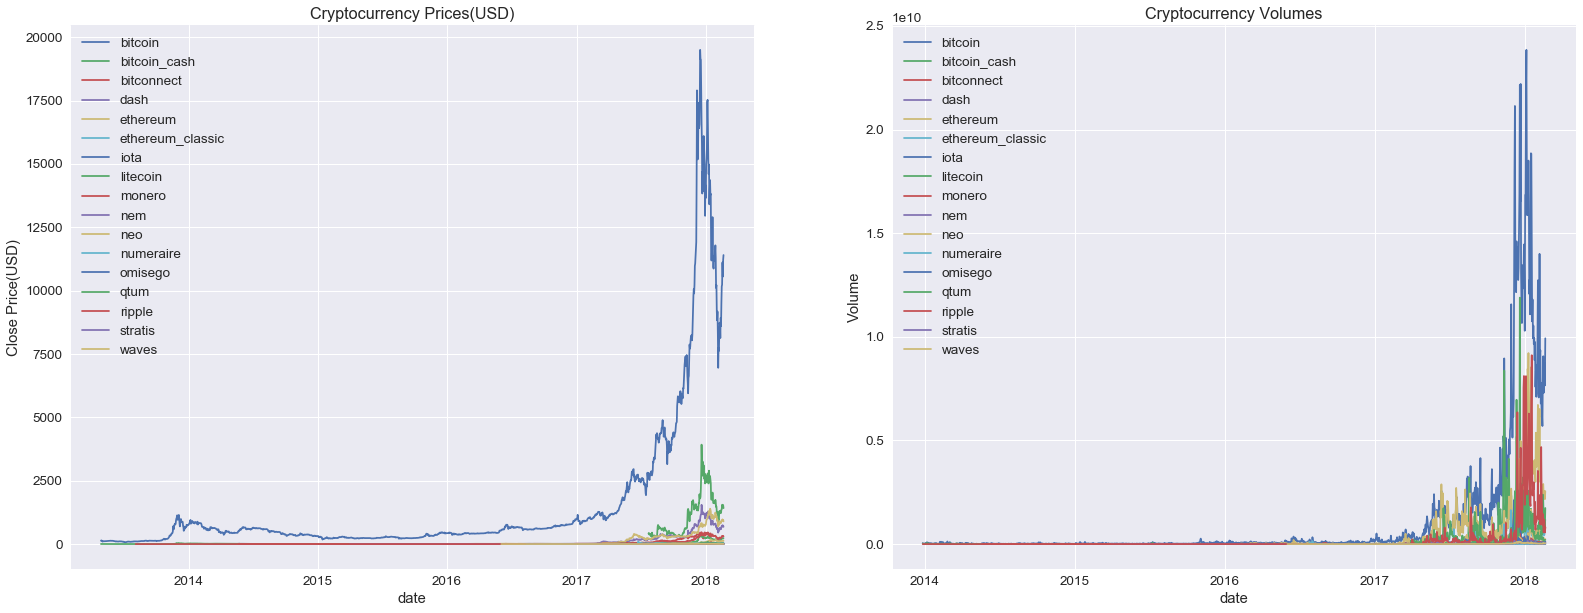

In [14]:
# Plot price of cryptocurrencies by time
plt.subplot(1, 2, 1)
for i in cc_names.sort_values():
    cc_close = cc_by_name.get_group(i).close
    cc_close.name = i
    cc_close.plot(figsize=(27,10), legend=True)
plt.title("Cryptocurrency Prices(USD)");
plt.ylabel("Close Price(USD)");

# Plot volume of cryptocurrencies by time
plt.subplot(1, 2, 2)
for i in cc_names.sort_values():
    cc_close = cc_by_name.get_group(i).volume
    cc_close.name = i
    cc_close.plot(figsize=(27,10), legend=True)
plt.title("Cryptocurrency Volumes");
plt.ylabel("Volume");

### Plot closing prices for major currencies over sample size - trend comparison
Currencies do not have the same range of dates

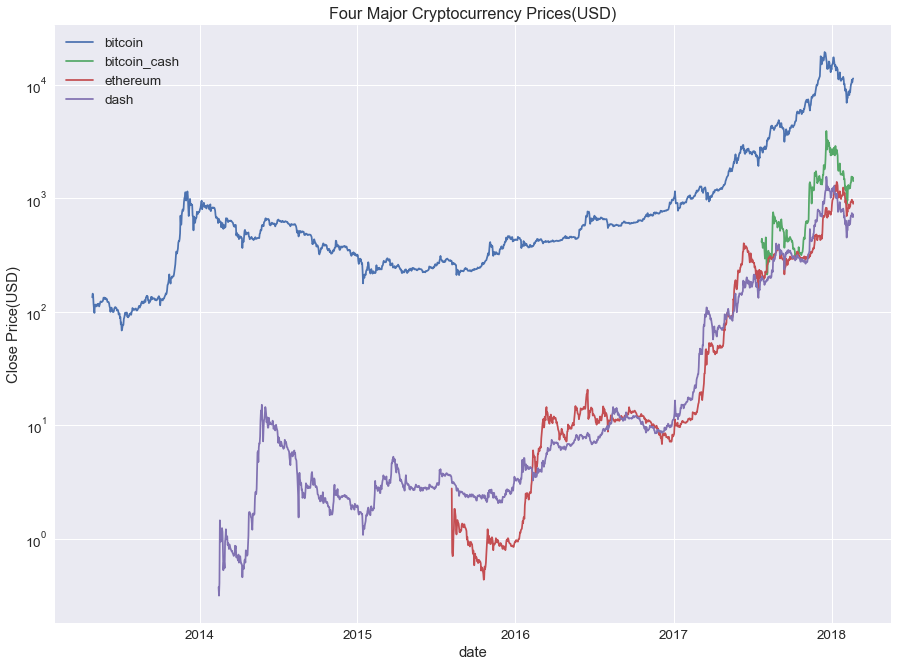

In [15]:
major_cc = ['bitcoin', 'bitcoin_cash', 'ethereum', 'dash']
for i in major_cc:
    cc_close_4 = cc_by_name.get_group(i).close
    cc_close_4.name = i
    cc_close_4.plot(figsize=(15,11), legend=True, logy=True)
plt.title("Four Major Cryptocurrency Prices(USD)");
plt.ylabel("Close Price(USD)");

### Intra-day volatility scatter plot for four over the last 365 days trading days of the the data

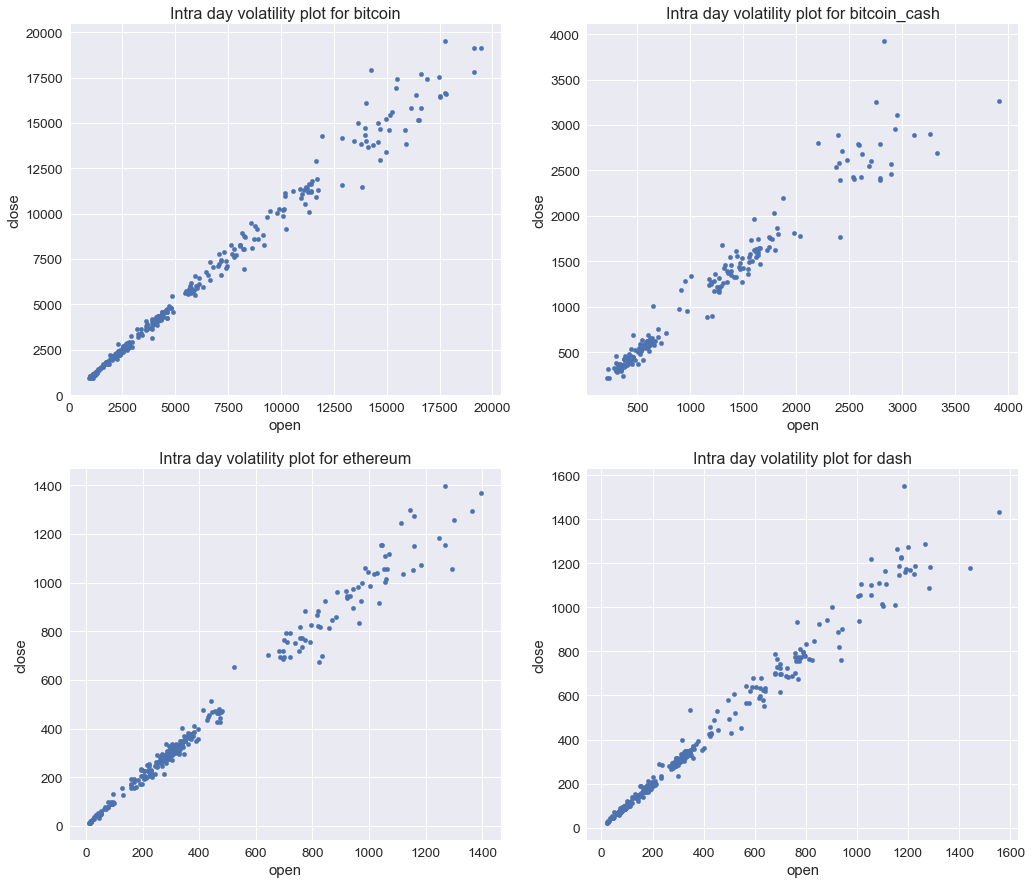

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
x = [0,0,1,1]
y = [0,1,0,1]
for i, j in enumerate(['bitcoin', 'bitcoin_cash', 'ethereum', 'dash']):
    cc_by_name.get_group(j)[:365].\
    plot(figsize =(17,15), x='open', y='close', kind='scatter', title=f'Intra day volatility plot for {j}',\
         ax=axes[x[i],y[i]])

### Merging cryptocurrency and S&P 500 data for analysis

In [17]:
close_df = sandp['close'].to_frame()
close_df = close_df[(close_df.index>='2013-04-29') & (close_df.index < '2018-02-20')]
close_df.columns.values[0] = 'sp500'

for i in cc_names:
    merging = cc_by_name.get_group(i)['close'].to_frame()
    merging.columns.values[0] = i
    close_df = close_df.merge(merging, left_index=True, right_index=True, how='outer')
close_df = close_df[~close_df['bitcoin'].isna() & ~close_df['sp500'].isna()]
display(close_df.head(n=2))
close_df.tail(n=2)

sp500  bitcoin  litecoin  ripple  dash  monero  nem  ethereum  \
date                                                                          
2013-04-29  1593.61   144.54      4.38     NaN   NaN     NaN  NaN       NaN   
2013-04-30  1597.57   139.00      4.30     NaN   NaN     NaN  NaN       NaN   

            waves  ethereum_classic  stratis  neo  bitconnect  qtum  iota  \
date                                                                        
2013-04-29    NaN               NaN      NaN  NaN         NaN   NaN   NaN   
2013-04-30    NaN               NaN      NaN  NaN         NaN   NaN   NaN   

            numeraire  omisego  bitcoin_cash  
date                                          
2013-04-29        NaN      NaN           NaN  
2013-04-30        NaN      NaN           NaN

sp500  bitcoin  litecoin  ripple    dash  monero       nem  \
date                                                                       
2018-02-15  2731.20  10166.4    225.43    1.15  703.86  303.25  0.561359   
2018-02-16  2732.22  10233.9    230.12    1.14  698.86  296.48  0.568887   

            ethereum  waves  ethereum_classic  stratis     neo  bitconnect  \
date                                                                         
2018-02-15    936.98   8.07             34.53     9.54  123.29        4.04   
2018-02-16    944.21   7.90             35.03     9.56  128.85        4.13   

             qtum  iota  numeraire  omisego  bitcoin_cash  
date                                                       
2018-02-15  33.06  2.13      22.16    16.67       1375.81  
2018-02-16  33.02  2.10      21.25    18.17       1552.20

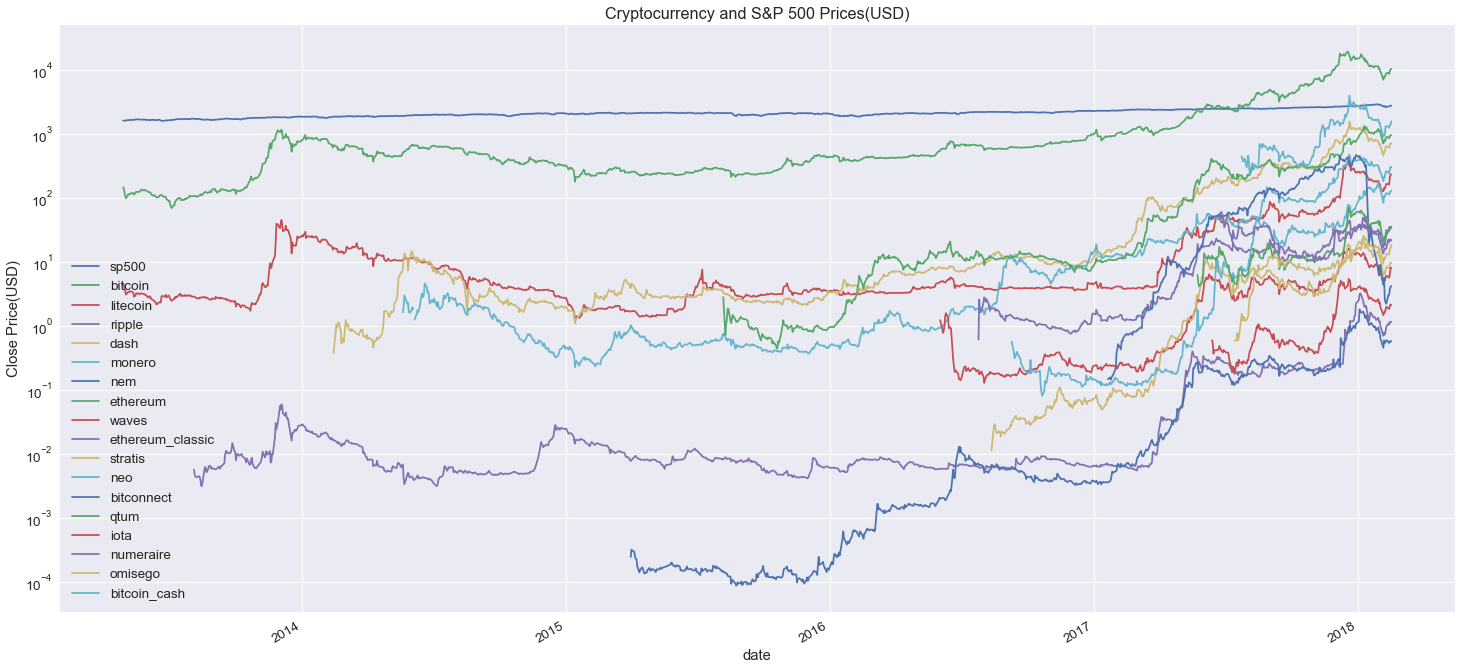

In [18]:
close_df.plot(y=close_df.columns.values[0:], kind="line", figsize=(25,12), logy=True )
plt.title("Cryptocurrency and S&P 500 Prices(USD)");
plt.ylabel("Close Price(USD)");
plt.show()


### Aggregate index of all crypto currencies correlated with s&p 
Data is normalized

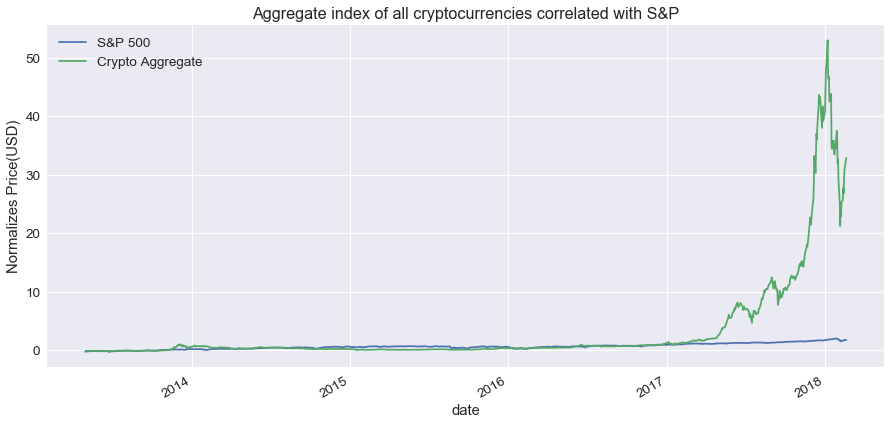

In [19]:
cc_by_date = crypto.groupby(crypto.index)
mean = cc_by_date.marketcap.mean().mean()
std =  cc_by_date.marketcap.std().std()
meansp = sandp.close.mean()
stdsp = sandp.close.std()

# Normalize
sandp_norm= sandp.close.apply(lambda x: (x-meansp)/stdsp)
crypto_norm = cc_by_date.marketcap.sum().apply(lambda x: (x-mean)/std)

# Plot 
x = sandp_norm.to_frame().merge(crypto_norm.to_frame(),left_index=True, right_index=True)
x.columns = ['S&P 500', 'Crypto Aggregate']
x.plot(figsize=(15,7), label='Crypto Aggregate',)
plt.title("Aggregate index of all cryptocurrencies correlated with S&P");
plt.ylabel("Normalizes Price(USD)");

### Heatmap showing intra-cryptocurrency correlation

In [20]:
cc_icorr = cc_by_name.get_group(cc_names[0])['close'].to_frame()
cc_icorr.columns.values[0] = cc_names[0]

for i in cc_names[1:]:
    merged = cc_by_name.get_group(i)['close'].to_frame()
    merged.columns.values[0] = i
    cc_icorr = cc_icorr.merge(merged, left_index=True, right_index=True)

### For Year 2017

In [21]:
x2 = cc_icorr['2017']
y2 = x2.pct_change().corr()
y2.head()

bitcoin  litecoin    ripple      dash    monero       nem  \
bitcoin   1.000000  0.519140  0.147271  0.246780  0.396418  0.290097   
litecoin  0.519140  1.000000  0.374497  0.391377  0.478825  0.512837   
ripple    0.147271  0.374497  1.000000  0.179367  0.404633  0.414676   
dash      0.246780  0.391377  0.179367  1.000000  0.564992  0.359187   
monero    0.396418  0.478825  0.404633  0.564992  1.000000  0.421882   

          ethereum     waves  ethereum_classic   stratis       neo  \
bitcoin   0.468577  0.495995          0.448378  0.413645  0.309331   
litecoin  0.757369  0.538300          0.691467  0.500319  0.374622   
ripple    0.480711  0.340587          0.418575  0.335374  0.276410   
dash      0.507069  0.329305          0.341405  0.292955  0.313889   
monero    0.602580  0.482473          0.596822  0.501334  0.363977   

          bitconnect      qtum      iota  numeraire   omisego  bitcoin_cash  
bitcoin     0.751020  0.394416  0.392381   0.297153  0.359364      0.105930  
litecoin    0.367239  0.527374  0.448822   0.388583  0.474042      0.247086  
ripple      0.184457  0.316399  0.208442   0.174596  0.310141      0.179244  
dash        0.206524  0.343415  0.371921   0.322340  0.377758      0.368717  
monero      0.280594  0.428908  0.523296   0.279543  0.411281      0.304405

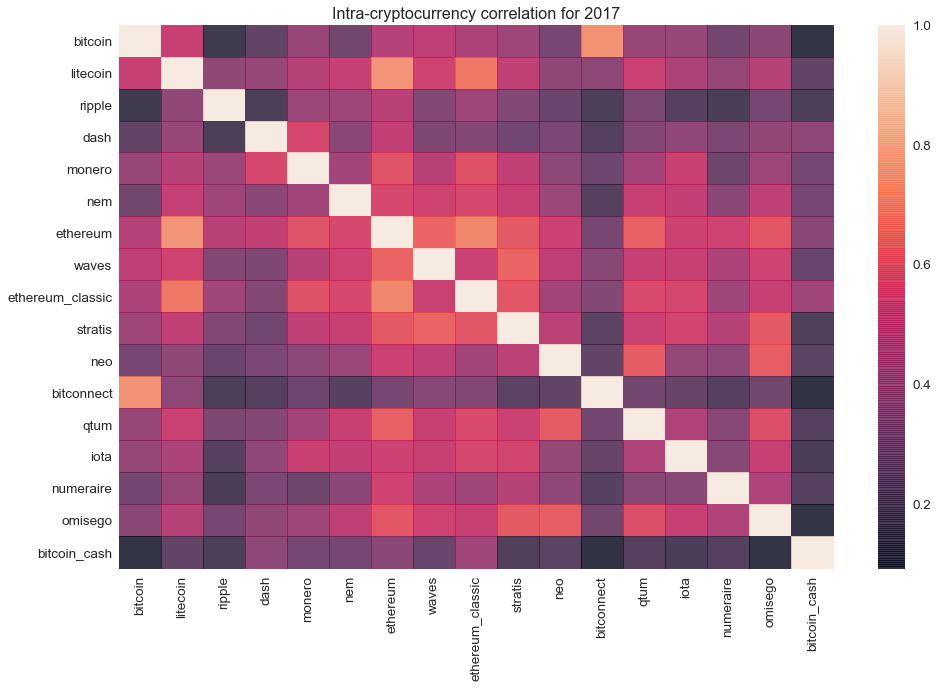

In [22]:
plt.figure(figsize=(16,10))
plt.title("Intra-cryptocurrency correlation for 2017");
sns.heatmap(y2, fmt='g', alpha = .8);

### For Year 2018

In [23]:
x = cc_icorr['2018']
y = x.pct_change().corr()
y.head()

bitcoin  litecoin    ripple      dash    monero       nem  \
bitcoin   1.000000  0.847770  0.695088  0.860424  0.859261  0.726911   
litecoin  0.847770  1.000000  0.681605  0.869960  0.842822  0.669804   
ripple    0.695088  0.681605  1.000000  0.773495  0.707346  0.773528   
dash      0.860424  0.869960  0.773495  1.000000  0.901650  0.708667   
monero    0.859261  0.842822  0.707346  0.901650  1.000000  0.769060   

          ethereum     waves  ethereum_classic   stratis       neo  \
bitcoin   0.796844  0.845143          0.791131  0.763905  0.731717   
litecoin  0.758110  0.816100          0.758122  0.693232  0.638525   
ripple    0.658900  0.597361          0.741839  0.541955  0.535018   
dash      0.837521  0.813386          0.838367  0.705114  0.722548   
monero    0.815057  0.843172          0.818515  0.793789  0.799252   

          bitconnect      qtum      iota  numeraire   omisego  bitcoin_cash  
bitcoin     0.420782  0.783107  0.822090   0.594309  0.741477      0.851411  
litecoin    0.408004  0.788834  0.810823   0.582015  0.775306      0.814826  
ripple      0.514706  0.750652  0.747794   0.587476  0.664534      0.654065  
dash        0.397038  0.814252  0.864912   0.662328  0.826868      0.847661  
monero      0.454519  0.802789  0.866478   0.629872  0.817767      0.825923

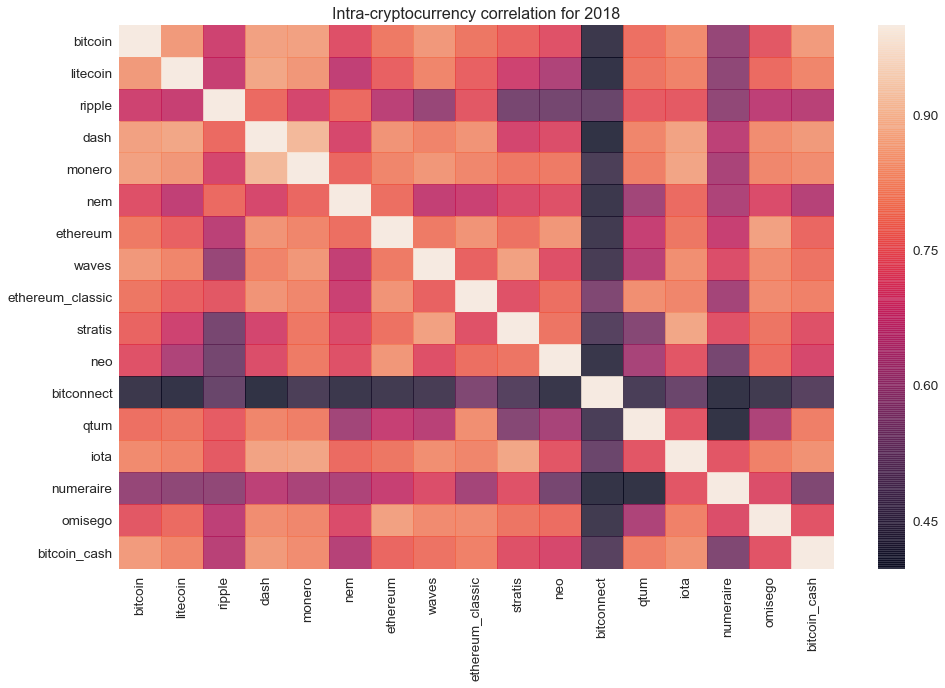

In [24]:
plt.figure(figsize=(16,10))
plt.title("Intra-cryptocurrency correlation for 2018");
sns.heatmap(y, fmt='g', alpha = .8);

---

### Monthly sentimental analysis of Bitcoin
Why did Bitcoin crash in 2014? - https://www.businessinsider.com/bitcoin-price-drop-2015-1

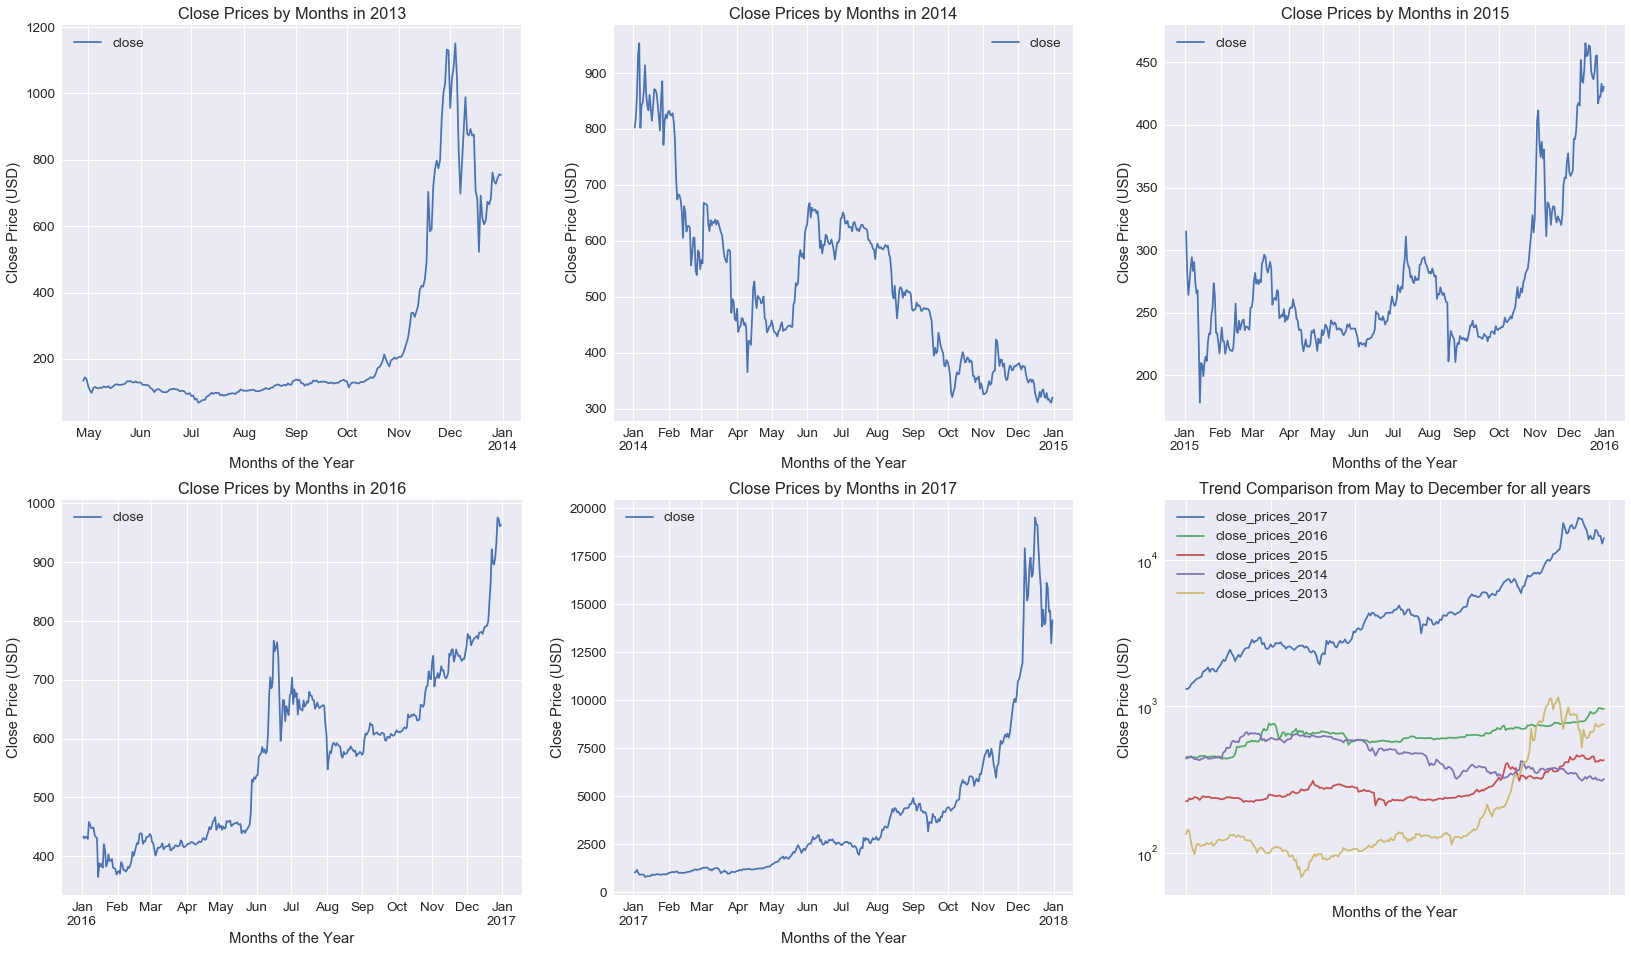

In [25]:
bitcoin_df = cc_by_name.get_group('bitcoin')
bitcoin_df_2017 = bitcoin_df[(bitcoin_df.index > '2017')&(bitcoin_df.index < '2018')]['close'].to_frame()
bitcoin_df_2016 = bitcoin_df[(bitcoin_df.index > '2016')&(bitcoin_df.index < '2017')]['close'].to_frame()
bitcoin_df_2015 = bitcoin_df[(bitcoin_df.index > '2015')&(bitcoin_df.index < '2016')]['close'].to_frame()
bitcoin_df_2014 = bitcoin_df[(bitcoin_df.index > '2014')&(bitcoin_df.index < '2015')]['close'].to_frame()
bitcoin_df_2013 = bitcoin_df[(bitcoin_df.index > '2013')&(bitcoin_df.index < '2014')]['close'].to_frame()
bitcoin_df_list=[bitcoin_df_2013, bitcoin_df_2014, bitcoin_df_2015, bitcoin_df_2016, bitcoin_df_2017]

fig, axes = plt.subplots(nrows=2, ncols=3)
year=2013
x = [0,0,0,1,1,1]
y = [0,1,2,0,1,2]
for j, i in enumerate(bitcoin_df_list):
    i['month_of_year'] = i.index.map(lambda x: x.strftime("%B"))
    s = i.plot(figsize =(28,16), ax=axes[x[j],y[j]], title=f"Close Prices by Months in {year}")
    year+=1
    s.set_ylabel("Close Price (USD)")
    s.set_xlabel("Months of the Year")

bitcoin_df_2017 = bitcoin_df_2017.reset_index()
bitcoin_df_2016 = bitcoin_df_2016.reset_index()
bitcoin_df_2015 = bitcoin_df_2015.reset_index()
bitcoin_df_2014 = bitcoin_df_2014.reset_index()
bitcoin_df_2013 = bitcoin_df_2013.reset_index()

merged_76 = bitcoin_df_2017.merge(bitcoin_df_2016, how='inner', left_index=True, right_index=True )
merged_765 = merged_76.merge(bitcoin_df_2015, how='inner', left_index=True, right_index=True )
merged_7654 = merged_765.merge(bitcoin_df_2014, how='inner', left_index=True, right_index=True )
merged_76543 = merged_7654.merge(bitcoin_df_2013, how='inner', left_index=True, right_index=True )

merged_76543.drop(merged_76543.columns[[0,2,3,5,6,8,9,11,12]], axis=1, inplace=True)
merged_76543.columns = ['close_prices_2017', 'close_prices_2016', 'close_prices_2015', 'close_prices_2014', 'close_prices_2013','month']
merged_76543 = merged_76543.sort_index(ascending=False)
k = merged_76543.plot(logy=True, x='month', figsize =(28,16), ax=axes[1,2], title="Trend Comparison from May to December for all years")
k.set_ylabel("Close Price (USD)")
k.set_xlabel("Months of the Year");

### S&P 500 trend by the month compared to Bitcoin

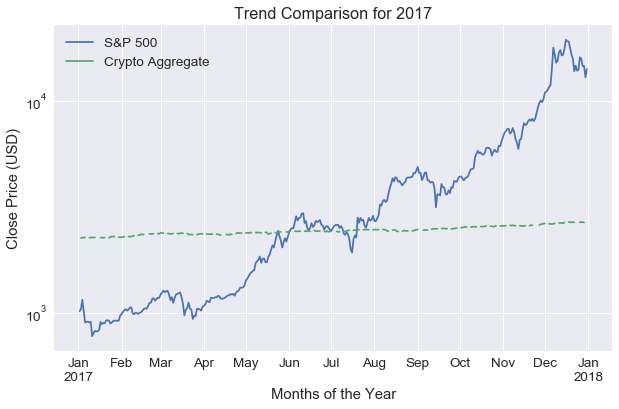

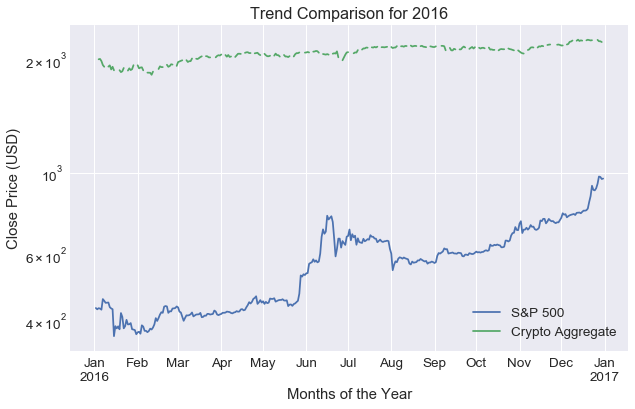

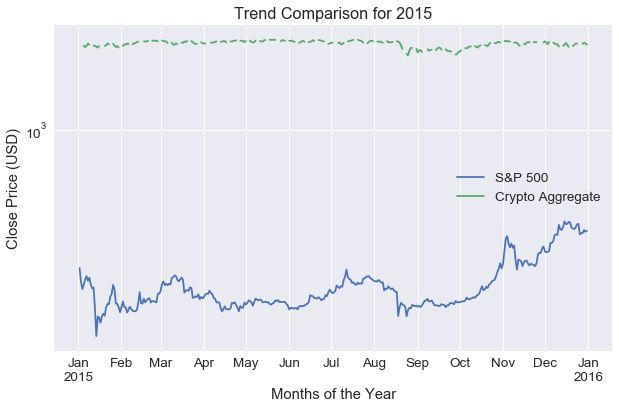

In [26]:
sp_df = pd.read_csv("sp_new_index_data/GSPC.csv", parse_dates=['Date'])
sp_df = sp_df.set_index('Date')
sp_df.index.name='date'

sp_df_2017 = sp_df[(sp_df.index > '2017')&(sp_df.index < '2018')]['Close'].to_frame()
sp_df_2016 = sp_df[(sp_df.index > '2016')&(sp_df.index < '2017')]['Close'].to_frame()
sp_df_2015 = sp_df[(sp_df.index > '2015')&(sp_df.index < '2016')]['Close'].to_frame()
sp_df_2014 = sp_df[(sp_df.index > '2014')&(sp_df.index < '2015')]['Close'].to_frame()
sp_df_list=[sp_df_2014, sp_df_2015, sp_df_2016, sp_df_2017]

# sp_df_2017
bitcoin_df_2017 = bitcoin_df_2017.set_index('date')
bitcoin_df_2016 = bitcoin_df_2016.set_index('date')
bitcoin_df_2015 = bitcoin_df_2015.set_index('date')

merged_76_sp = bitcoin_df_2017.merge(sp_df_2017, how='outer', left_index=True, right_index=True )
merged_76_sp.columns = ['S&P 500', 'month_of_year', 'Crypto Aggregate']
k = merged_76_sp.plot(logy=True, figsize =(10,6),title="Trend Comparison for 2017")
k.set_ylabel("Close Price (USD)")
k.set_xlabel("Months of the Year");


merged_76_sp = bitcoin_df_2016.merge(sp_df_2016, how='outer', left_index=True, right_index=True )
merged_76_sp.columns = ['S&P 500', 'month_of_year', 'Crypto Aggregate']
k = merged_76_sp.plot(logy=True, figsize =(10,6),title="Trend Comparison for 2016")
k.set_ylabel("Close Price (USD)")
k.set_xlabel("Months of the Year");

merged_76_sp = bitcoin_df_2015.merge(sp_df_2015, how='outer', left_index=True, right_index=True )
merged_76_sp.columns = ['S&P 500', 'month_of_year', 'Crypto Aggregate']
k = merged_76_sp.plot(logy=True, figsize =(10,6),title="Trend Comparison for 2015")
k.set_ylabel("Close Price (USD)")
k.set_xlabel("Months of the Year");

### More correlations with additional S&P 500 data

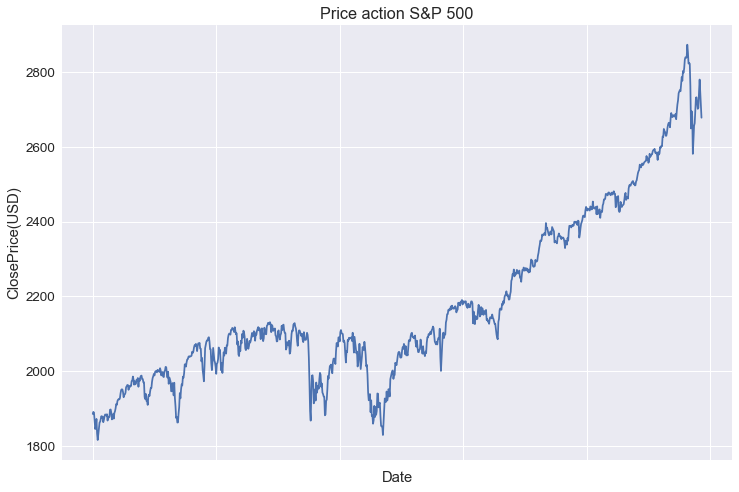

In [27]:
sandp_new = pd.read_csv("sp_new_index_data/GSPC.csv")
sandp_new.set_index('Date', inplace=True)
sandp_new['Close'].plot(figsize=(12,8))
plt.title("Price action S&P 500");
plt.ylabel("ClosePrice(USD)");

### Combined price and volume chart for S&P 

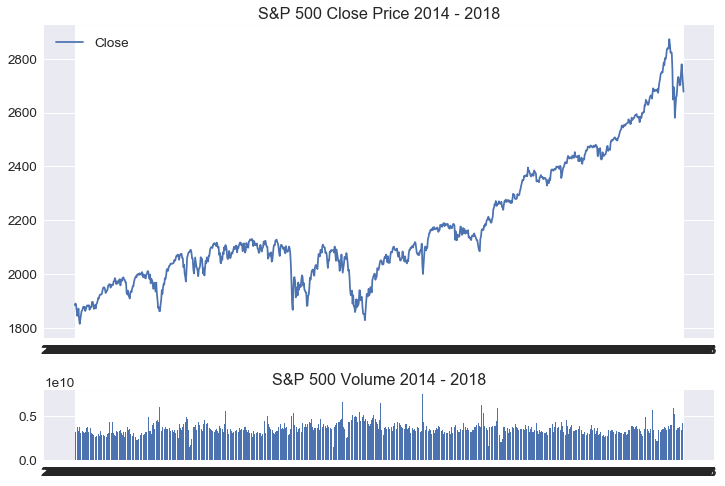

In [28]:
top = plt.subplot2grid ((4,4), (0,0),rowspan=3,colspan=4)
top.plot(sandp_new.index, sandp_new['Close'], label='Close')
plt.title('S&P 500 Close Price 2014 - 2018')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4)
bottom.bar(sandp_new.index, sandp_new['Volume'], label='Volume')
plt.title('S&P 500 Volume 2014 - 2018')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

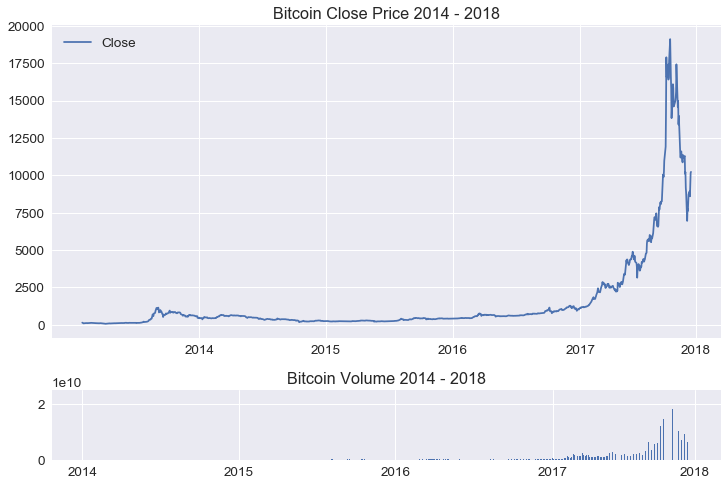

In [29]:
volume_df = sandp_new['Volume'].to_frame()
volume_df.columns.values[0] = 'sp500'

for cc_name in cc_names:
    merging = cc_by_name.get_group(cc_name)['volume'].to_frame()
    merging.columns.values[0] = cc_name
    volume_df = volume_df.merge(merging, left_index=True, right_index=True, how="outer")
volume_df = volume_df[~volume_df['bitcoin'].isna() & ~volume_df['sp500'].isna()]

top = plt.subplot2grid ((4,4), (0,0),rowspan=3,colspan=4)
top.plot(close_df.index, close_df['bitcoin'], label='Close')
plt.xticks(['2014-04-01', '2015-04-01', '2016-04-01', '2017-04-03', '2018-03-01'])
plt.title('Bitcoin Close Price 2014 - 2018')
plt.legend(loc=2)

bottom = plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4)
bottom.bar(volume_df.index, volume_df['bitcoin'], label='Volume')
plt.xticks(['2014-04-01', '2015-04-01', '2016-04-01', '2017-04-03', '2018-03-01'])
plt.title('Bitcoin Volume 2014 - 2018')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

### Combined volume chart for S&P 500 and cryptocurrencies

In [30]:
volume_df = sandp_new['Volume'].to_frame()
volume_df.columns.values[0] = 'sp500'

for cc_name in cc_names:
    merging = cc_by_name.get_group(cc_name)['volume'].to_frame()
    merging.columns.values[0] = cc_name
    volume_df = volume_df.merge(merging, left_index=True, right_index=True, how="outer")
volume_df = volume_df[~volume_df['bitcoin'].isna() & ~volume_df['sp500'].isna()]
volume_df.head()

sp500     bitcoin    litecoin    ripple     dash  monero  \
2014-04-01  3.336190e+09  35685800.0   7346120.0  172709.0  36211.0     NaN   
2014-04-02  3.131660e+09  49647600.0  14966900.0  306889.0  21722.0     NaN   
2014-04-03  3.055600e+09  40765500.0  10985500.0  172873.0  18610.0     NaN   
2014-04-04  3.583750e+09  22925500.0   5857970.0  132007.0  11863.0     NaN   
2014-04-07  3.801540e+09  15616600.0   3903230.0   62187.0  45233.0     NaN   

            nem  ethereum  waves  ethereum_classic  stratis  neo  bitconnect  \
2014-04-01  NaN       NaN    NaN               NaN      NaN  NaN         NaN   
2014-04-02  NaN       NaN    NaN               NaN      NaN  NaN         NaN   
2014-04-03  NaN       NaN    NaN               NaN      NaN  NaN         NaN   
2014-04-04  NaN       NaN    NaN               NaN      NaN  NaN         NaN   
2014-04-07  NaN       NaN    NaN               NaN      NaN  NaN         NaN   

            qtum  iota  numeraire  omisego  bitcoin_cash  
2014-04-01   NaN   NaN        NaN      NaN           NaN  
2014-04-02   NaN   NaN        NaN      NaN           NaN  
2014-04-03   NaN   NaN        NaN      NaN           NaN  
2014-04-04   NaN   NaN        NaN      NaN           NaN  
2014-04-07   NaN   NaN        NaN      NaN           NaN

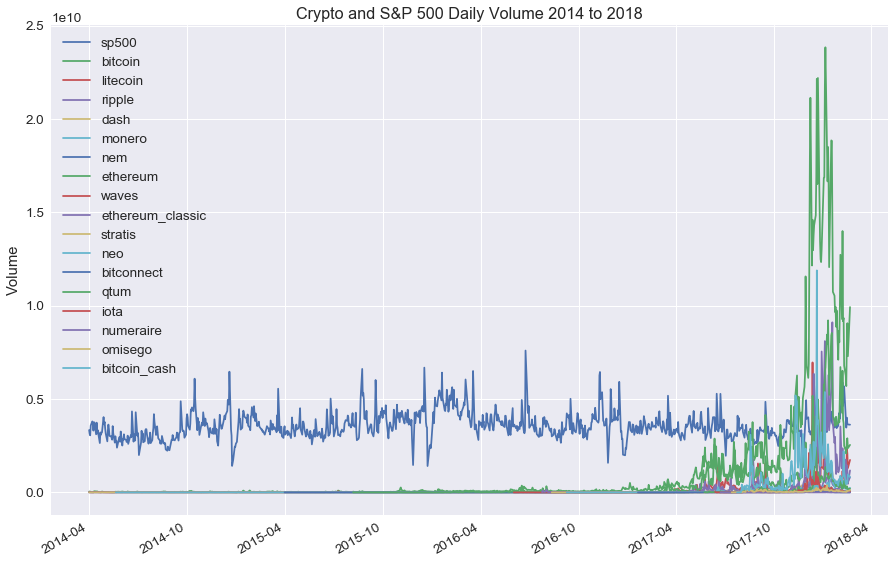

In [31]:
volume_df.plot(kind="line", figsize=(15,10))
plt.title("Crypto and S&P 500 Daily Volume 2014 to 2018")
plt.ylabel("Volume");

### Bitcoin and S&P 500 stability measurement using Histogram

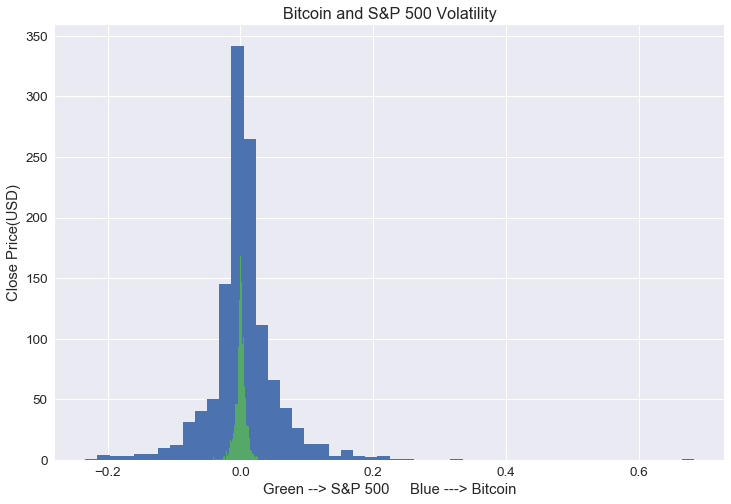

In [32]:
daily_pct_change = close_df.pct_change()
Bitcoin_daily_chg = daily_pct_change['bitcoin']
Bitcoin_daily_chg.hist(bins=50, figsize=(12,8))
plt.ylabel("Close Price(USD)");

SandP_daily_chg = daily_pct_change['sp500']
SandP_daily_chg.hist(bins=50, figsize=(12,8))
plt.xlabel("Green --> S&P 500     Blue ---> Bitcoin");
plt.title("Bitcoin and S&P 500 Volatility");

### Do Cryptocurrencies, Bitcoin, specifically provide non-correlated return to S&P 500?

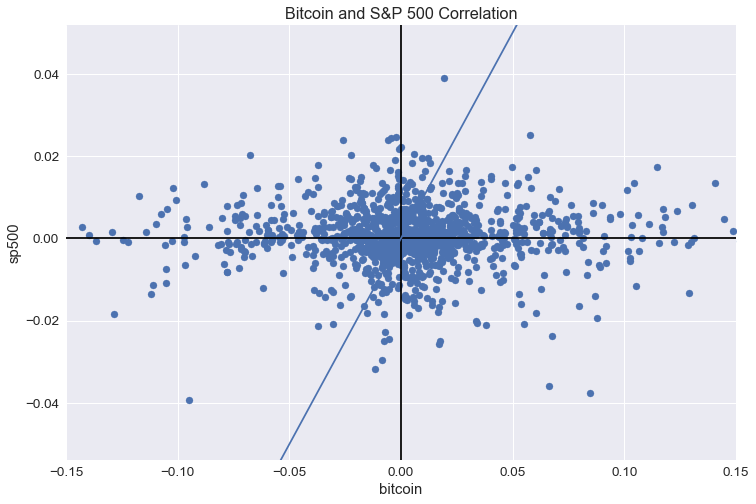

In [33]:
def render_scatter_plot(data, x_stock_name, y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10, 10), (-10, 10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)
limits =[-0.15,0.15]
render_scatter_plot(daily_pct_change, 'bitcoin','sp500', xlim=limits)
plt.title("Bitcoin and S&P 500 Correlation");

# The End